In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# List of feature names in stock_level_list
stock_level_list = [
    'mvel1', 'beta', 'betasq', 'chmom', 'dolvol',
    'idiovol', 'indmom', 'mom1m', 'mom6m', 'mom12m', 'mom36m', 'pricedelay',
    'turn', 'absacc', 'acc', 'age', 'agr', 'cashdebt', 'cashpr', 'cfp',
    'cfp_ia', 'chatoia', 'chcsho', 'chempia', 'chinv', 'chpmia', 'convind',
    'currat', 'depr', 'divi', 'divo', 'dy', 'egr', 'ep', 'gma', 'grcapx',
    'grltnoa', 'herf', 'hire', 'invest', 'lev', 'lgr', 'mve_ia', 'operprof',
    'orgcap', 'pchcapx_ia', 'pchcurrat', 'pchdepr', 'pchgm_pchsale',
    'pchquick', 'pchsale_pchinvt', 'pchsale_pchrect', 'pchsale_pchxsga',
    'pchsaleinv', 'pctacc', 'ps', 'quick', 'rd', 'rd_mve', 'rd_sale',
    'realestate', 'roic', 'salecash', 'saleinv', 'salerec', 'secured',
    'securedind', 'sgr', 'sin', 'sp', 'tang', 'tb', 'aeavol', 'cash',
    'chtx', 'cinvest', 'ear', 'nincr', 'roaq', 'roavol', 'roeq', 'rsup',
    'stdacc', 'stdcf', 'ms', 'baspread', 'ill', 'maxret', 'retvol',
    'std_dolvol', 'std_turn', 'zerotrade', 'bm', 'bm_ia'
]

In [2]:
ENet_full = pd.read_parquet("project2/feature_importance/enet_full_importance.parquet")
GLM_full = pd.read_parquet("project2/feature_importance/GLM_top_g_importance.parquet")
OLS_full = pd.read_parquet("project2/feature_importance/ols_full_importance.parquet")

RF_full = pd.read_csv("project2/feature_importance/RF_feature_importances_top.csv")
XGBoost_full = pd.read_csv("project2/feature_importance/XGBfeature_importances_all.csv")
NN1_full = pd.read_parquet("project2/feature_importance/top_Importance_NN1.parquet")
NN2_full = pd.read_parquet("project2/feature_importance/top_Importance_NN2.parquet")
NN3_full = pd.read_parquet("project2/feature_importance/top_Importance_NN3.parquet")
NN4_full = pd.read_parquet("project2/feature_importance/top_Importance_NN4.parquet")
NN5_full = pd.read_parquet("project2/feature_importance/top_Importance_NN5.parquet")

In [3]:
PCR_full = pd.read_parquet("project2/feature_importance/PCA_full_x_importance(2).parquet")
PLS_full = pd.read_parquet("project2/feature_importance/PLS_full_y_x_importance(1).parquet")

In [4]:
PCR_full = PCR_full.reset_index()
PLS_full = PLS_full.reset_index()
PLS_full

,Feature,Importance
0,absacc,0.000016
1,absacc_macro_bm,0.000016
2,absacc_macro_dfy,0.001606
3,absacc_macro_ntis,0.000395
4,absacc_macro_svar,0.005139
...,...,...
915,zerotrade_macro_svar,0.007409
916,zerotrade_macro_tbl,0.000353
917,zerotrade_macro_tms,0.000786
918,zerotrade_marco_dp,0.000012


In [5]:

dataframes = {
    "OLS": OLS_full,
    "PLS": PLS_full,
    "PCR": PCR_full,
    "ENet": ENet_full,
    "GLM": GLM_full,
    "RF": RF_full,
    "XGBoost": XGBoost_full,
    "NN1": NN1_full,
    "NN2": NN2_full,
    "NN3": NN3_full,
    "NN4": NN4_full,
    "NN5": NN5_full
}
for model_name, df in dataframes.items():
    df.columns = ['Feature', 'Importance']  
    dataframes[model_name] = df.rename(columns={"Importance": model_name})  


feature_full = None
for model_name, df in dataframes.items():
    if feature_full is None:
        feature_full = df
    else:
        feature_full = feature_full.merge(df[['Feature', model_name]], on='Feature', how='outer')


print(feature_full)

                  Feature       OLS       PLS       PCR      ENet  \
0                  absacc  0.000127  0.000016  0.001051  0.000000   
1         absacc_macro_bm  0.000561  0.000016  0.000694  0.000000   
2        absacc_macro_dfy  0.000041  0.001606  0.000013  0.000000   
3       absacc_macro_ntis  0.000233  0.000395  0.000011  0.000000   
4       absacc_macro_svar  0.000056  0.005139  0.000002  0.000000   
..                    ...       ...       ...       ...       ...   
915  zerotrade_macro_svar  0.000104  0.007409  0.000005  0.000000   
916   zerotrade_macro_tbl  0.000673  0.000353  0.000130  0.000000   
917   zerotrade_macro_tms  0.001503  0.000786  0.000045  0.000000   
918    zerotrade_marco_dp  0.002954  0.000012  0.008099  0.024823   
919    zerotrade_marco_ep  0.000781  0.000015  0.006409  0.000390   

              GLM        RF   XGBoost       NN1       NN2       NN3       NN4  \
0   -1.320785e-04  0.000870  0.000000  0.001294  0.001231  0.001208  0.001214   
1   -1.18

In [11]:
feature_merged = {}


for model_name in feature_full.columns[1:]:  
    model_importance = {}
    for stock_level_feature in stock_level_list:
        pattern = f'{stock_level_feature}_'
        matched_features = feature_full[
            feature_full['Feature'].str.contains(pattern, case=False)
        ]
        if not matched_features.empty:
            model_importance[stock_level_feature] = matched_features[model_name].sum()
    

    matched_features_sic2 = feature_full[
        feature_full['Feature'].str.contains('sic2', case=False)
    ]
    if not matched_features_sic2.empty:
        model_importance['sic2'] = matched_features_sic2[model_name].sum()
    
    feature_merged[model_name] = model_importance

feature_merged_df = pd.DataFrame(feature_merged).reset_index().rename(columns={'index': 'Feature'})

print(feature_merged_df)

      Feature       OLS       PLS       PCR      ENet       GLM        RF  \
0       mvel1  0.015503  0.012442  0.019065  0.033984  0.000513  0.044155   
1        beta  0.009241  0.027776  0.013407  0.000393  0.000999  0.009306   
2      betasq  0.009547  0.027116  0.013546  0.001490  0.000530  0.009173   
3       chmom  0.013395  0.024268  0.001741  0.043966  0.001397  0.009596   
4      dolvol  0.014614  0.028647  0.031476  0.028858 -0.001670  0.031196   
..        ...       ...       ...       ...       ...       ...       ...   
90   std_turn  0.011259  0.017069  0.010719  0.064665  0.001109  0.008883   
91  zerotrade  0.010179  0.013236  0.015906  0.025213  0.002653  0.009145   
92         bm  0.022374  0.026754  0.024781  0.020846  0.003289  0.013957   
93      bm_ia  0.008322  0.011678  0.010603  0.003481  0.002516  0.007863   
94       sic2  0.336991  0.017402  0.002848  0.144658 -0.016798  0.000110   

     XGBoost       NN1       NN2       NN3       NN4       NN5  
0   0.0067

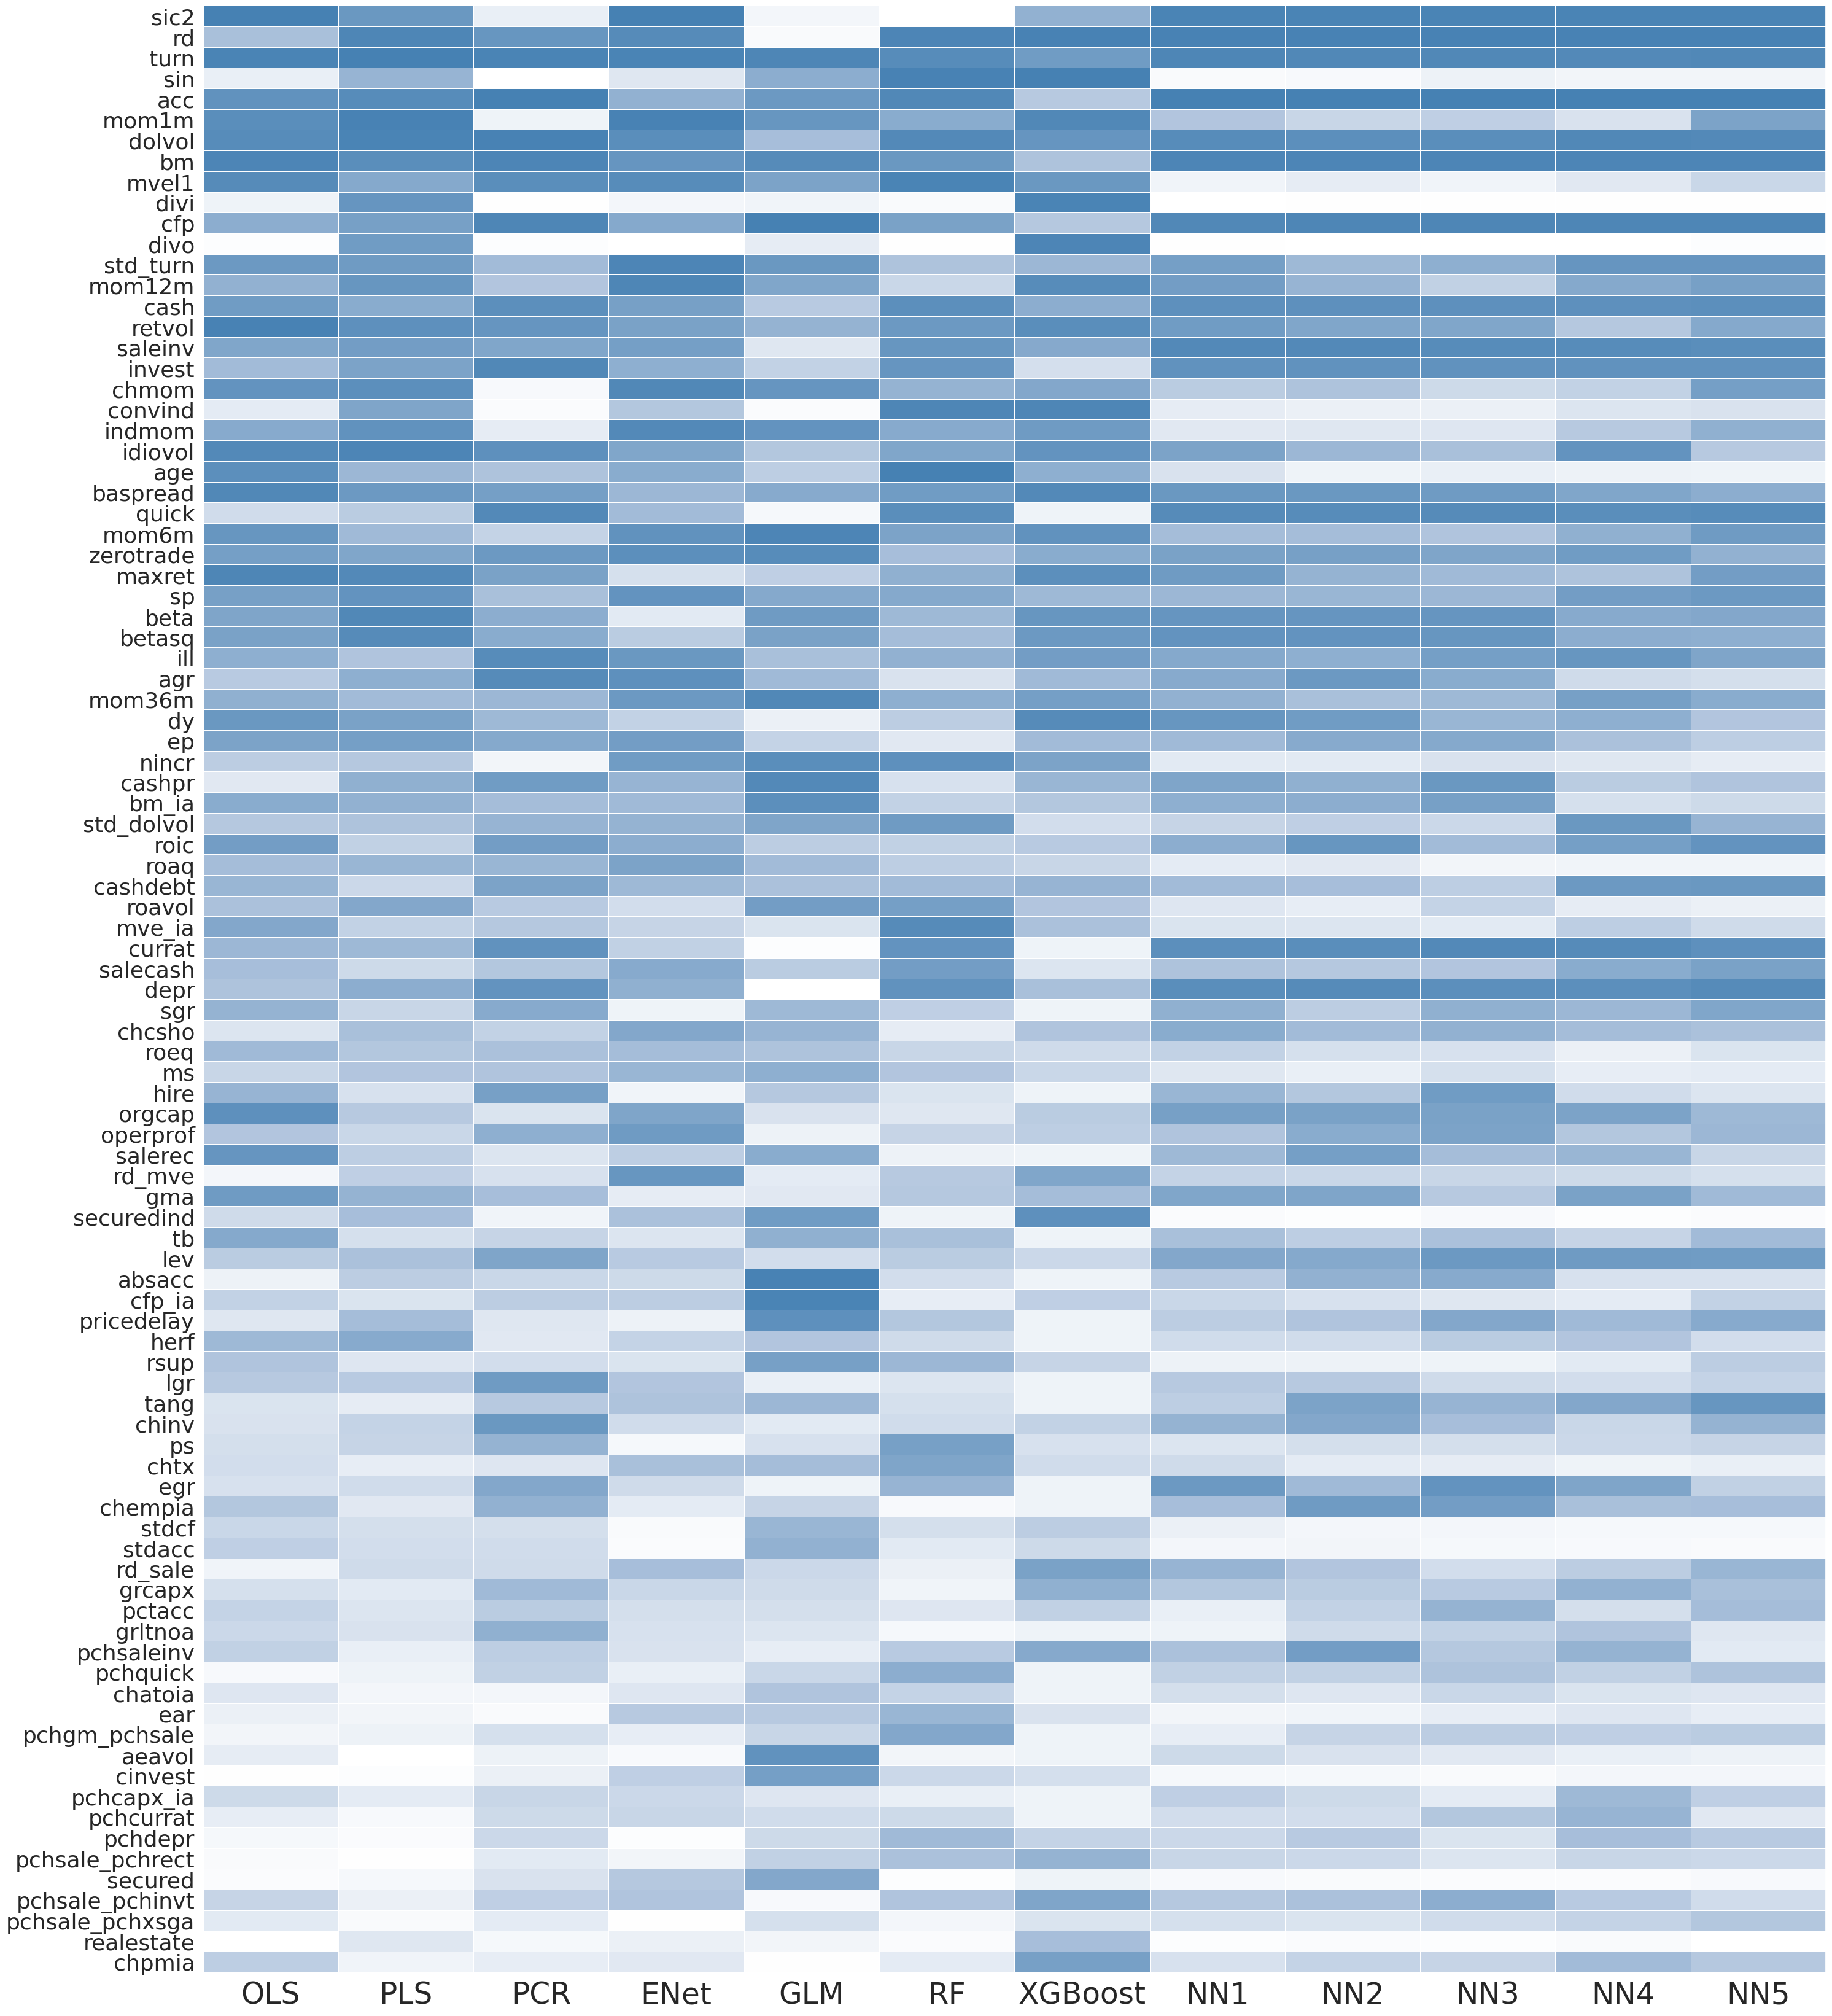

In [127]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
sns.set()

feature_merged_df['Total_Importance'] = feature_merged_df.iloc[:, 1:].sum(axis=1)
feature_merged_df = feature_merged_df.sort_values(by='Total_Importance', ascending=False).drop(columns=['Total_Importance'])

ranked_df = feature_merged_df.copy()
for model in ranked_df.columns[1:]:  
    ranked_df[model] = ranked_df[model].rank(ascending=False)

ranked_df.set_index('Feature', inplace=True)

data = ranked_df.values
features = ranked_df.index
models = ranked_df.columns

data = data[::-1]
features = features[::-1]


custom_cmap = mcolors.LinearSegmentedColormap.from_list(
   "custom_blues", ["#4681B3", "#B0C4DD", "#FFFFFF"]  
)

fig, ax = plt.subplots(figsize=(30, 33))
cmap = plt.get_cmap("Blues_r")  
heatmap = ax.pcolormesh(data, cmap=custom_cmap, edgecolors='white',linewidth = 0.4)  
# heatmap = ax.pcolormesh(data, cmap=cmap)


ax.set_xticks(np.arange(data.shape[1]) + 0.5)
ax.set_yticks(np.arange(data.shape[0]) + 0.5)

ax.set_xticklabels(models, fontsize = 35)
ax.set_yticklabels(features, fontsize=26)  

ax.set_ylabel('')

plt.tight_layout()
plt.show()
